average sum : 77.12
average old : 14.085
average sum : 78.88
average old : 15.8
average sum : 117.02
average old : 19.145
average sum : 86.125
average old : 15.35
89.78625
16.095


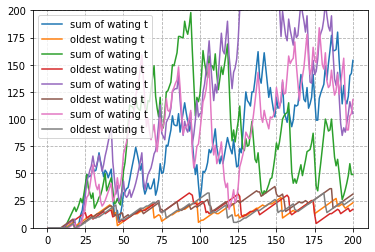

In [36]:
from Junction import Junction, MC
from random import randint
import numpy as np

class Junction2x2:
    '''
    0 1
    2 3
    '''
    def __init__(self):
        self.J = [Junction() for i in range(4)]
        self.signal = [-1 for i in range(4)]
        self.time = 0

    def cars_in(self):
        idx = [[3, 4, 5, 9, 10, 11], [0, 1, 2, 9, 10, 11], [3, 4, 5, 6, 7, 8], [0, 1, 2, 6, 7, 8]]
        for i, li in enumerate(idx):
            self.J[i].cars_in(li)
    
    def cars_out(self, actions):
        nxtroad = [[1, 2], [0, 3], [0, 3], [1, 2]]
        nxtlane = [[0, 6], [3, 6], [9, 0], [9, 3]]
        fromlane = [[[1, 6, 11], [2, 3, 7]], [[4, 8, 9], [2, 3, 7]],
            [[0, 5, 10], [1, 6, 11]], [[0, 5, 10], [4, 8, 9]]]
        
        for idx, (x, y, z) in enumerate(zip(nxtroad, nxtlane, fromlane)):
            if self.signal[idx] == actions[idx]:
                outlane = self.J[idx].cars_out(actions[idx])
                self.J[idx].signal = actions[idx]
                for i, j, k in zip(x, y, z):
                    for _ in range(sum(outlane[m] for m in k)):
                        rd = randint(0, 2)
                        self.J[i].road[j + rd].append([self.time, rd])
                        self.J[i].test[j // 3] += 1

        self.signal = actions

    def step(self, actions):
        prevs = [0 for i in range(4)]
        results = [[0 for i in range(3)] for j in range(4)]
        for i in range(4):
            prevs[i] = sum(sum((self.time - car[0]) ** 1 for car in road) for road in self.J[i].road)

        self.cars_in()
        self.cars_out(actions)
        
        for i in range(4):
            results[i][1], results[i][2] = self.J[i].get_reward(prevs[i])
            self.J[i].time += 1
        self.time += 1

        for i in range(4):
            results[i][0] = self.get_adjusted_state(i)
            if results[i][2] == 0:
                self.J[i].info.append([self.J[i].time, prevs[i], self.J[i].get_oldest()])
           
        return results[0], results[1], results[2], results[3]

    def get_adjusted_state(self, idx):
        adj = [[1, 2], [0, 2], [0, 3], [1, 2]]
        lane = [[0, 6], [3, 6], [9, 0], [9, 3]]
        state = np.zeros(28)
        old_state = self.J[idx].get_state()[[0, 1, 3, 4, 6, 7, 9, 10], :]
        for i in range(24):
            state[i] = old_state[i // 3][i % 3]

        for idx, (i, j) in enumerate(zip(adj[idx], lane[idx])):
            for k in range(2):
                state[24 + idx * 2 + k] = len(self.J[i].road[j + k])

        return state
            


    def render(self):
        str0 = self.J[0].render().split('\n')
        str1 = self.J[1].render().split('\n')
        maxlen = max(map(len, str0))
        for i in range(len(str0)):
            str0[i] += " " * (maxlen - len(str0[i])) + " || " + str1[i]
            
        a = "\n".join(str0)

        str2 = self.J[2].render().split('\n')
        str3 = self.J[3].render().split('\n')
        maxlen = max(map(len, str2))
        for i in range(len(str2)):
            str2[i] += " " * (maxlen - len(str2[i])) + " || " + str3[i]
             
        b = "\n".join(str2)

        return a + "\n" + b
          

if __name__ == "__main__":
    from time import sleep
    env = Junction2x2()
    aaa, bbb = [], []

    for step in range(200):
#         a0, a1, a2, a3 = MC(env.J[0]), MC(env.J[1]), MC(env.J[2]), MC(env.J[3])
        
        seq = [0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7]
        a0 = seq[step % 32]
        a1 = seq[step % 32]
        a2 = seq[step % 32]
        a3 = seq[step % 32]
        


        j0, j1, j2, j3 = env.step([a0, a1, a2, a3])

#         print(env.render())
#         print("sum of waiting time 0", j0[1], "waiting time 1", j1[1])
#         print(f"누적: {env.J[0].test} {env.J[1].test}")
#         print("sum of waiting time 2", j2[1], "waiting time 3", j3[1])
#         print(f"누적: {env.J[2].test} {env.J[3].test}")
#         print("\n\n\n\n")
#         sleep(0.1)
        
        if any([j0[2], j1[2], j2[2], j3[2]]):
            break
    for j in range(4):
        env.J[j].save_graph(f"performance/Sequence{j}.png")
        info = np.array(env.J[j].info)
        t, w, o = info[:, 0], info[:, 1], info[:, 2]
        aaa.append(sum(w)/t[-1])
        bbb.append(sum(o)/t[-1])
    print(sum(aaa)/len(aaa))
    print(sum(bbb)/len(bbb))

        


average sum : 78.485
average old : 12.94
average sum : 72.765
average old : 11.625
average sum : 65.65
average old : 11.39
average sum : 141.79
average old : 17.355
89.6725
13.3275


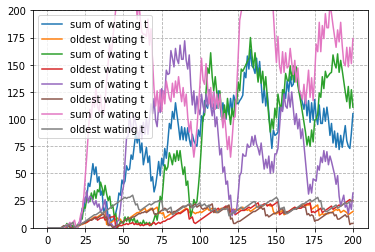

In [33]:
from Junction import Junction, MC
from random import randint
import numpy as np

class Junction2x2:
    '''
    0 1
    2 3
    '''
    def __init__(self):
        self.J = [Junction() for i in range(4)]
        self.signal = [-1 for i in range(4)]
        self.time = 0

    def cars_in(self):
        idx = [[3, 4, 5, 9, 10, 11], [0, 1, 2, 9, 10, 11], [3, 4, 5, 6, 7, 8], [0, 1, 2, 6, 7, 8]]
        for i, li in enumerate(idx):
            self.J[i].cars_in(li)
    
    def cars_out(self, actions):
        nxtroad = [[1, 2], [0, 3], [0, 3], [1, 2]]
        nxtlane = [[0, 6], [3, 6], [9, 0], [9, 3]]
        fromlane = [[[1, 6, 11], [2, 3, 7]], [[4, 8, 9], [2, 3, 7]],
            [[0, 5, 10], [1, 6, 11]], [[0, 5, 10], [4, 8, 9]]]
        
        for idx, (x, y, z) in enumerate(zip(nxtroad, nxtlane, fromlane)):
            if self.signal[idx] == actions[idx]:
                outlane = self.J[idx].cars_out(actions[idx])
                self.J[idx].signal = actions[idx]
                for i, j, k in zip(x, y, z):
                    for _ in range(sum(outlane[m] for m in k)):
                        rd = randint(0, 2)
                        self.J[i].road[j + rd].append([self.time, rd])
                        self.J[i].test[j // 3] += 1

        self.signal = actions

    def step(self, actions):
        prevs = [0 for i in range(4)]
        results = [[0 for i in range(3)] for j in range(4)]
        for i in range(4):
            prevs[i] = sum(sum((self.time - car[0]) ** 1 for car in road) for road in self.J[i].road)

        self.cars_in()
        self.cars_out(actions)
        
        for i in range(4):
            results[i][1], results[i][2] = self.J[i].get_reward(prevs[i])
            self.J[i].time += 1
        self.time += 1

        for i in range(4):
            results[i][0] = self.get_adjusted_state(i)
            if results[i][2] == 0:
                self.J[i].info.append([self.J[i].time, prevs[i], self.J[i].get_oldest()])
           
        return results[0], results[1], results[2], results[3]

    def get_adjusted_state(self, idx):
        adj = [[1, 2], [0, 2], [0, 3], [1, 2]]
        lane = [[0, 6], [3, 6], [9, 0], [9, 3]]
        state = np.zeros(28)
        old_state = self.J[idx].get_state()[[0, 1, 3, 4, 6, 7, 9, 10], :]
        for i in range(24):
            state[i] = old_state[i // 3][i % 3]

        for idx, (i, j) in enumerate(zip(adj[idx], lane[idx])):
            for k in range(2):
                state[24 + idx * 2 + k] = len(self.J[i].road[j + k])

        return state
            


    def render(self):
        str0 = self.J[0].render().split('\n')
        str1 = self.J[1].render().split('\n')
        maxlen = max(map(len, str0))
        for i in range(len(str0)):
            str0[i] += " " * (maxlen - len(str0[i])) + " || " + str1[i]
            
        a = "\n".join(str0)

        str2 = self.J[2].render().split('\n')
        str3 = self.J[3].render().split('\n')
        maxlen = max(map(len, str2))
        for i in range(len(str2)):
            str2[i] += " " * (maxlen - len(str2[i])) + " || " + str3[i]
             
        b = "\n".join(str2)

        return a + "\n" + b
          

if __name__ == "__main__":
    from time import sleep
    env = Junction2x2()
    aaa, bbb = [], []

    for step in range(200):
        a0, a1, a2, a3 = MC(env.J[0]), MC(env.J[1]), MC(env.J[2]), MC(env.J[3])
        
#         seq = [0,0,0,0,1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5,6,6,6,6,7,7,7,7]
#         a0 = seq[step % 32]
#         a1 = seq[step % 32]
#         a2 = seq[step % 32]
#         a3 = seq[step % 32]
        


        j0, j1, j2, j3 = env.step([a0, a1, a2, a3])

#         print(env.render())
#         print("sum of waiting time 0", j0[1], "waiting time 1", j1[1])
#         print(f"누적: {env.J[0].test} {env.J[1].test}")
#         print("sum of waiting time 2", j2[1], "waiting time 3", j3[1])
#         print(f"누적: {env.J[2].test} {env.J[3].test}")
#         print("\n\n\n\n")
#         sleep(0.1)
        if any([j0[2], j1[2], j2[2], j3[2]]):
            break
    for j in range(4):
        env.J[j].save_graph(f"performance/Sequence{j}.png")
        info = np.array(env.J[j].info)
        t, w, o = info[:, 0], info[:, 1], info[:, 2]
        aaa.append(sum(w)/t[-1])
        bbb.append(sum(o)/t[-1])
    print(sum(aaa)/len(aaa))
    print(sum(bbb)/len(bbb))


